# Practical 22


### Problem Statement : To predict Housing Price using Population status in Boston Housing dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for plotting graphs
from sklearn.model_selection import train_test_split # for splitting the data into training and test data
from sklearn.linear_model import LinearRegression #for using LinearRegression 
from sklearn import metrics

###### Load the Boston dataset

In [2]:
# https://www.kaggle.com/datasets/puxama/bostoncsv
data = pd.read_csv("D:\ML Dataset\Boston.csv") 
data.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


##### Dropping 1st column

In [3]:
# Dropping the 1st column "Unnamed" as it has numbers from 1 to 506 which can be easily replaced by the row indexes for 
# accessing different rows. Hence this column is useless in model building.
data.drop(columns=['Unnamed: 0'], axis=0, inplace=True)

# viewing the top 5 rows after deleting the 1st column
data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


######  Have a glance at the data

In [4]:
data.shape #no. of rows * no. of columns 

(506, 14)

In [5]:
# quick summary of the dataset
data.describe() 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


######  Have a glance at the dependent and independent variables

In [6]:
# accessing all the rows of 'lstat' and 'medv' column
# Here "lstat" is Independent column and "medv" is Dependent column

data_ = data.loc[:,['lstat','medv']] 
data_.head(5) # viewing first 5 rows of the dependent and independent column

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


######  Visualize the change in the variables

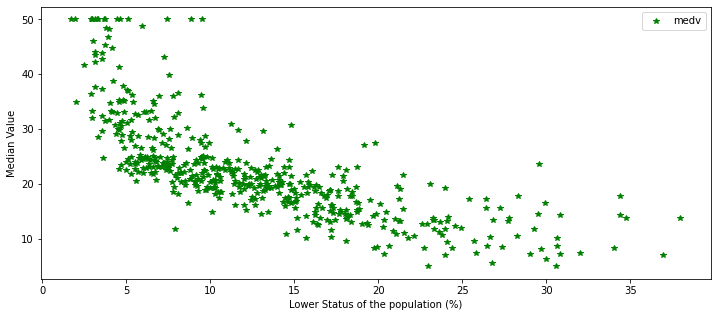

In [7]:
data.plot (x= 'lstat' , y='medv', style='*', color = "green", figsize=(12,5))
plt.xlabel('Lower Status of the population (%)')
plt.ylabel( 'Median Value' )
plt.show()

###### Divide the data into independent and dependent variables.

In [8]:
X = pd.DataFrame(data['lstat']) # Independent Variable
y = pd.DataFrame(data['medv']) # Dependent Variable

##### Step 6: Split the data into train and test sets

In [9]:
# Splitting the dataset in to Training and Test datasets such that 20% of the data will be in the test set
# and 80% of data for training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [10]:
# Viewing Independent training data
print("X_train : \n", X_train[0:5])
# Viewing Independent testing data
print("X_test  : \n", X_test[0:5])
# Viewing Dependent training data
print("y_train : \n", y_train[0:5])
# Viewing Dependent testing data
print("y_test  : \n", y_test[0:5])

X_train : 
      lstat
355   5.57
460  16.42
120  14.37
346  12.67
457  16.94
X_test  : 
      lstat
357  13.27
337  10.56
327  12.79
13    8.26
418  20.62
y_train : 
      medv
355  20.6
460  16.4
120  22.0
346  17.2
457  13.5
y_test  : 
      medv
357  21.7
337  18.5
327  22.2
13   20.4
418   8.8


######  Shape of the train and test sets

In [11]:
print("X_train : ", X_train.shape)
print("X_test  : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test  : ", y_test.shape)

X_train :  (404, 1)
X_test  :  (102, 1)
y_train :  (404, 1)
y_test  :  (102, 1)


###### Train the algorithm

In [12]:
# Now we create an instance (object) of LinearRegression class.
# Naming the object as 'regressor' and simply calling the class constructor LinearRegression().
# No parameters required.

regressor = LinearRegression()

#Now we have got a Linear Regression model but we have to train it on the training set.
#For this we have to connect it to the training set using fit() function

regressor.fit(X_train, y_train) 

#predicting "medv" for all the values of "lstat" column in X_test
y_pred = regressor.predict(X_test) 

###### Retrieve the intercept and coeffiecient of Linear Regression Equation

In [13]:
# It is the point where the function crosses the y-axis
# y = m * x + C
print("Intercept(C) : ", regressor.intercept_)
print(" Slope (m) : ", regressor.coef_)

Intercept(C) :  [34.46193558]
 Slope (m) :  [[-0.93547456]]


###### Predicted Value

In [14]:
# viewing first 5 predicted values for the first 10 values from X_test data.
y_pred[0:5]

array([[22.04818821],
       [24.58332426],
       [22.497216  ],
       [26.73491574],
       [15.17245022]])

###### Actual Value

In [15]:
# Viewing first 5 Actual Values for the first 10 values of the test data
y_test[0:5]

,medv
357,21.7
337,18.5
327,22.2
13,20.4
418,8.8


######  Evaluate the algorithm

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.1642675336118815
Mean Squared Error: 36.112232015652886
Root Mean Squared Error: 6.009345389944972


In [17]:
# It tells us how many points fall on the regression line.

print('R squared : {:.2f}'.format(regressor.score(X,y)*100))

# It tell the accuracy of the model
print('Accuracy Score : {:.2f} {}'.format(regressor.score(X_test,y_test)*100,"%"))

R squared : 54.39
Accuracy Score : 55.31 %
